In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Conv2D, ReLU, Conv2DTranspose
from tensorflow.keras.activations import relu

In [2]:
def one_8_8(shape, dtype=None):
    ker = np.zeros(shape)
    for i in range(shape[0]):
        for j in range(shape[1]):
            ker[i][j][0][i*8+j]=1
    return ker

In [3]:
dct2c_model = tf.keras.Sequential(name = "DCTtoChannel")
dct2c_model.add((tf.keras.Input(shape=(96,96,1))))
dct2c_model.add(Conv2D(64,8,strides=8, kernel_initializer=one_8_8, trainable = False))

In [4]:
dct2c_model.summary()

Model: "DCTtoChannel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 12, 12, 64)        4160      
Total params: 4,160
Trainable params: 0
Non-trainable params: 4,160
_________________________________________________________________


In [5]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

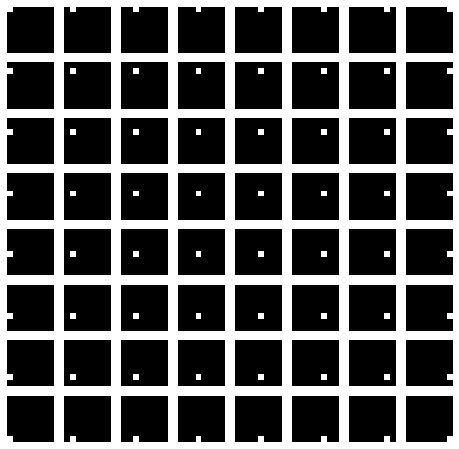

In [6]:
filters = dct2c_model.layers[0].get_weights()[0][:,:,0,:]


plt.figure(figsize = (8,8))
gs1 = gridspec.GridSpec(8, 8)

for i in range(64):
    ax = plt.subplot(gs1[i])
    ax.imshow(filters[:,:,i], cmap='gray')
    ax.axis('off')

In [7]:
x = np.zeros((96,96,3))
x[:,:,1] = 100
x[:,:,2] = 200

In [8]:
for i in range(96):
    for j in range(96):
        x[i,j,0] = (j%8)+8*(i%8)
        #x[i,j,0] = i*96+j

In [9]:
first_channel_x = x[:,:,0]
first_channel_x = tf.expand_dims(first_channel_x,2)
first_channel_x = tf.expand_dims(first_channel_x,0)

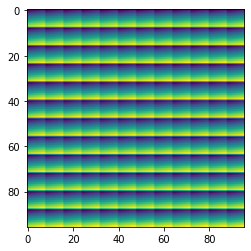

In [10]:
plt.imshow(first_channel_x[0,:,:,0])

In [11]:
y = dct2c_model(first_channel_x)
y = tf.squeeze(y)

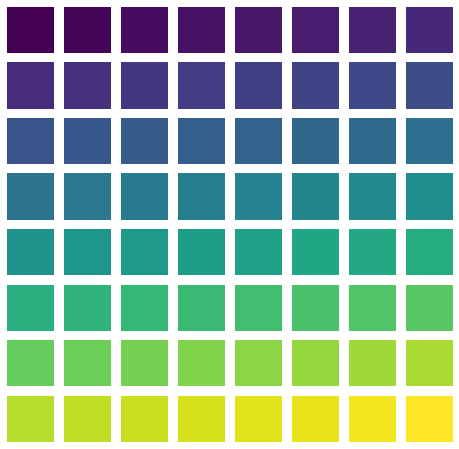

In [12]:
plt.figure(figsize = (8,8))
gs2 = gridspec.GridSpec(8, 8)

for i in range(64):
    im = y[:,:,i]
    ax = plt.subplot(gs2[i])
    ax.imshow(im,vmin = 0, vmax = 63)
    ax.axis('off')

In [14]:
c2dtc_model = tf.keras.Sequential(name = "Channel2DCT")
c2dtc_model.add((tf.keras.Input(shape=(12,12,64))))
c2dtc_model.add(Conv2DTranspose(1,8,strides=8, kernel_initializer=one_8_8, trainable = False))
c2dtc_model.summary()

Model: "Channel2DCT"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose (Conv2DTran (None, 96, 96, 1)         4097      
Total params: 4,097
Trainable params: 0
Non-trainable params: 4,097
_________________________________________________________________


In [15]:
z = c2dtc_model(tf.expand_dims(y, axis=0))

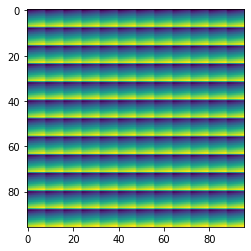

In [16]:
plt.imshow(z[0].numpy()[:,:,0])